# EDA

- creator: 김기범

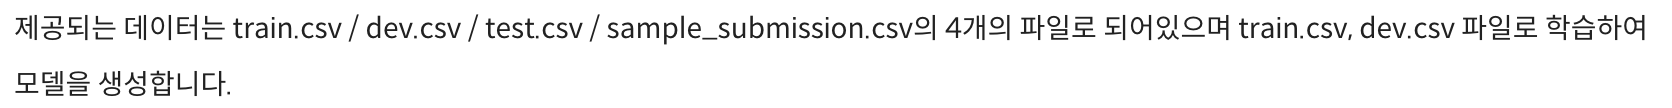
> 출처: https://stages.ai/competitions/236/data/traininghttps://stages.ai/competitions/236/data/training

- idea
    - 보통 유저가 train에서 split해 train | valid를 나누는데 왜 dev 파일이 주어졌지?
    - train, dev를 이용해 학습해서 모델을 생성해라.. dev를 꼭 평가용으로 사용하라는 말이 없네?
    - dev가 적절하게 분리되어 있는 데이터인지 확인하고 "아니라면" train과 하나로 합쳐버리고 내 기준으로 새로운 valid를 만들어야겠다.

## import

In [18]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'
mpl.rcParams['axes.unicode_minus'] = False
mpl.style.use('seaborn-whitegrid')

%matplotlib inline

## 1. 데이터 기본 정보 확인

- train datasms 9324개 있으며, 6개의 컬럼을 가짐
- label을 예측하는 문제

In [19]:
train_df = pd.read_csv('data/train.csv')
val_df = pd.read_csv('data/dev.csv')

print('train shape')
print(train_df.shape)
print('val shape')
print(val_df.shape)

train shape
(9324, 6)
val shape
(550, 6)


In [6]:
# 컬럼명
train_df.columns

Index(['id', 'source', 'sentence_1', 'sentence_2', 'label', 'binary-label'], dtype='object')

In [8]:
train_df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [64]:
train_df['source'].unique()

array(['nsmc-sampled', 'slack-rtt', 'petition-sampled', 'slack-sampled',
       'nsmc-rtt', 'petition-rtt'], dtype=object)

In [25]:
print("="*10, 'train info', "="*10)
train_df.info()
print()
print("="*10, 'val info', "="*10)
val_df.info()

========== train info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9324 entries, 0 to 9323
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            9324 non-null   object 
 1   source        9324 non-null   object 
 2   sentence_1    9324 non-null   object 
 3   sentence_2    9324 non-null   object 
 4   label         9324 non-null   float64
 5   binary-label  9324 non-null   float64
dtypes: float64(2), object(4)
memory usage: 437.2+ KB

========== val info ==========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            550 non-null    object 
 1   source        550 non-null    object 
 2   sentence_1    550 non-null    object 
 3   sentence_2    550 non-null    object 
 4   label         550 non-null    float64
 5   binary-label  550 non

### 1.1 중복 데이터 확인

- sentence1과 sentence2의 중복 여부를 파악 -> sentence2는 중복 문장 존재
- sum()으로 살펴 본 결과, sentence1과 sentence2가 동시에 중복되는 데이터는 없음

In [15]:
train_df[train_df.duplicated('sentence_1',keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label


In [14]:
train_df[train_df.duplicated('sentence_2',keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
173,boostcamp-sts-v1-train-173,slack-rtt,다음에 다시 재밌는 이야기해요!,다음에 또 즐겁게 이야기합시다!,3.6,1.0
601,boostcamp-sts-v1-train-601,slack-rtt,다음에 또 뵈어요!,다음에 만나요!,4.0,1.0
4523,boostcamp-sts-v1-train-4523,petition-rtt,청소년보호법 폐지요,청소년보호법 폐지해주세요,4.0,1.0
4706,boostcamp-sts-v1-train-4706,petition-rtt,청소년 보호법 폐지 부탁드립니다,청소년보호법 폐지해주세요,4.2,1.0
6540,boostcamp-sts-v1-train-6540,slack-rtt,다음에 또 즐겁게 이야기 나누어요!,다음에 또 즐겁게 이야기합시다!,4.4,1.0
8520,boostcamp-sts-v1-train-8520,slack-rtt,다음에 꼭 뵈어요!,다음에 만나요!,3.4,1.0


In [16]:
train_df.duplicated(['sentence_1', 'sentence_2']).sum()

0

In [26]:
val_df[train_df.duplicated('sentence_1',keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label


In [27]:
val_df[train_df.duplicated('sentence_2',keep=False)]

,id,source,sentence_1,sentence_2,label,binary-label
173,boostcamp-sts-v1-dev-173,slack-sampled,너무 귀엽네요 ㅋㅋ,스몰 u 너무 귀엽네요ㅋㅋ,2.4,0.0


In [28]:
train_df.duplicated(['sentence_1', 'sentence_2']).sum()

0

## 2. 시각화

### 2.1 LABEL별 분포 확인

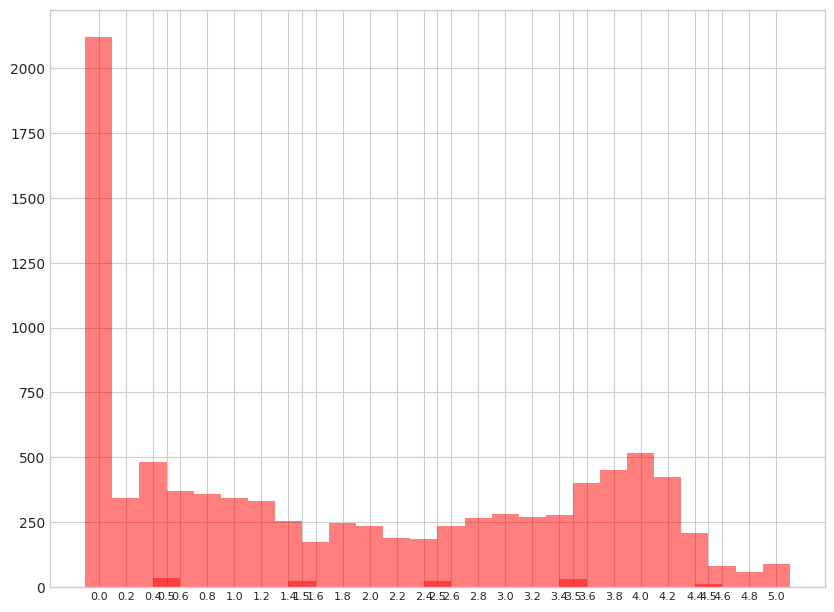

In [63]:
# train
train_label_count = train_df['label'].value_counts()

plt.figure(figsize=(10,7.5))

plt.bar(train_label_count.keys(), train_label_count.values, width=0.2, color='r', alpha=0.5)
plt.xticks(train_label_count.keys(), fontsize=8) # x축 값, 폰트 크기 설정

plt.show()

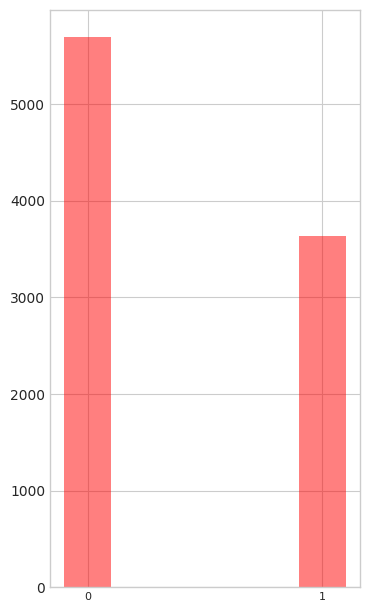

In [70]:
# train
train_label_count = train_df['binary-label'].value_counts()

plt.figure(figsize=(4,7.5))

plt.bar(train_label_count.keys(), train_label_count.values, width=0.2, color='r', alpha=0.5)
plt.xticks(train_label_count.keys(), fontsize=8) # x축 값, 폰트 크기 설정

plt.show()

<Axes: xlabel='label'>

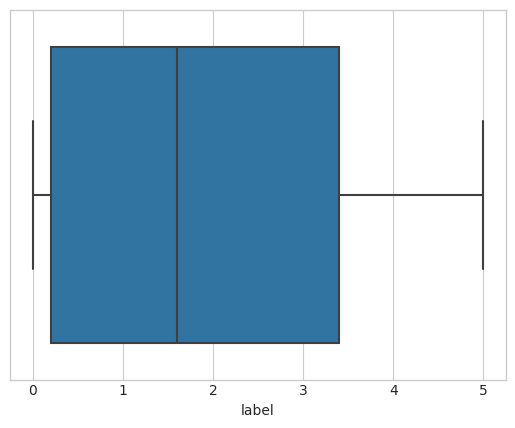

In [39]:
sns.boxplot(x='label', data=train_df)

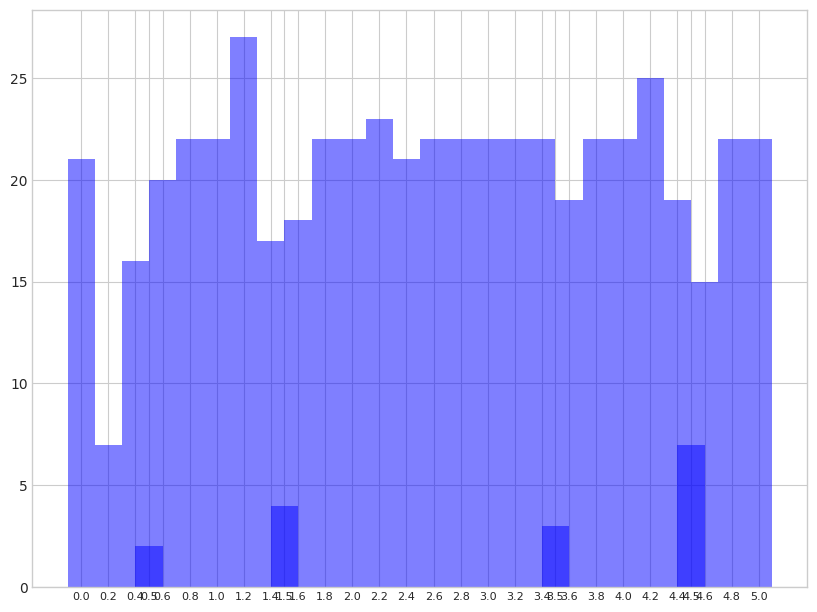

In [62]:
# validation
val_label_count = val_df['label'].value_counts()

plt.figure(figsize=(10,7.5))

plt.bar(val_label_count.keys(), val_label_count.values, width=0.2, color='b', alpha=0.5)
plt.xticks(val_label_count.keys(), fontsize=8) # x축 값, 폰트 크기 설정

plt.show()

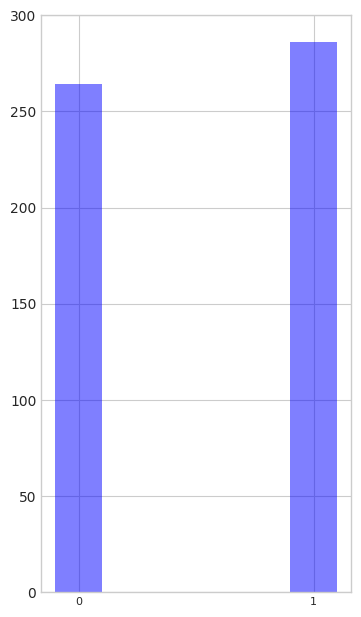

In [71]:
# validation
val_label_count = val_df['binary-label'].value_counts()

plt.figure(figsize=(4,7.5))

plt.bar(val_label_count.keys(), val_label_count.values, width=0.2, color='b', alpha=0.5)
plt.xticks(val_label_count.keys(), fontsize=8) # x축 값, 폰트 크기 설정

plt.show()

<Axes: xlabel='label'>

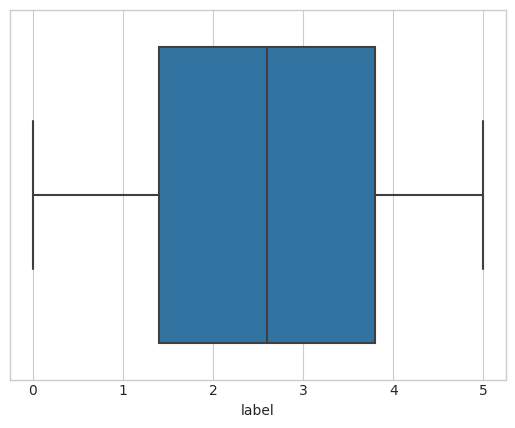

In [42]:
sns.boxplot(x='label', data=val_df)

### 2.2 source별 분포 확인

[rtt 설명](https://medium.com/ai-networkkr/%EB%AA%A8%EB%91%90%EC%9D%98-ai-%ED%95%9C%EA%B5%AD%EC%96%B4-%EC%9E%90%EC%97%B0%EC%96%B4-%EC%9D%B4%ED%95%B4-%EB%B2%A4%EC%B9%98%EB%A7%88%ED%81%AC-%EB%8D%B0%EC%9D%B4%ED%84%B0-%EC%85%8B-klue-eaeab688f035#:~:text=STS(Semantic%20Textual,%EC%83%9D%EC%84%B1%ED%95%A0%20%EC%88%98%20%EC%9E%88%EC%97%88%EC%8A%B5%EB%8B%88%EB%8B%A4.)

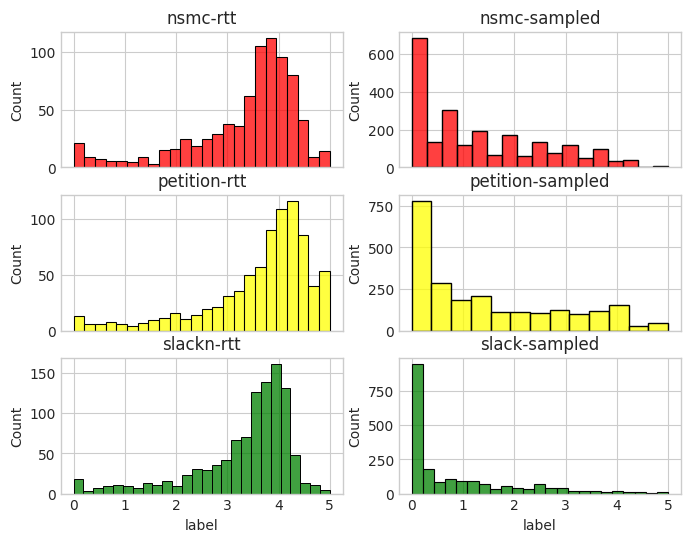

In [75]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_df[train_df['source']=='nsmc-rtt']['label'], color="red", ax=axes[0, 0])
b = sns.histplot(train_df[train_df['source']=='nsmc-sampled']['label'], color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_df[train_df['source']=='petition-rtt']['label'], color="yellow", ax=axes[1, 0])
d = sns.histplot(train_df[train_df['source']=='petition-sampled']['label'], color="yellow", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_df[train_df['source']=='slack-rtt']['label'], color="green", ax=axes[2, 0])
f = sns.histplot(train_df[train_df['source']=='slack-sampled']['label'], color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

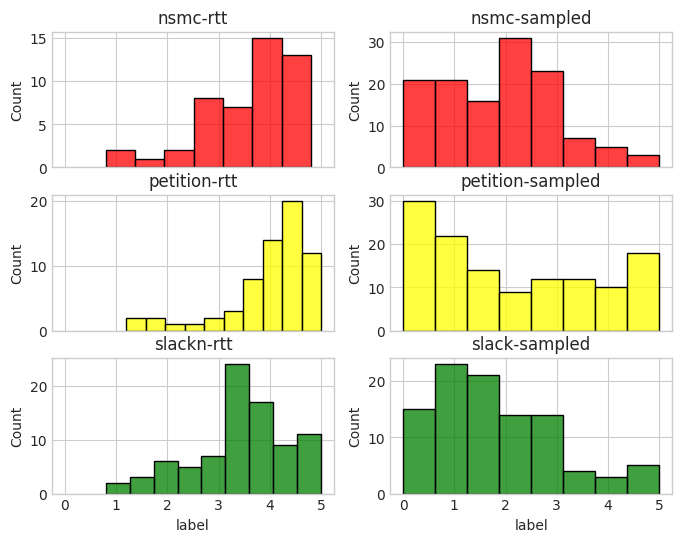

In [76]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(val_df[val_df['source']=='nsmc-rtt']['label'], color="red", ax=axes[0, 0])
b = sns.histplot(val_df[val_df['source']=='nsmc-sampled']['label'], color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(val_df[val_df['source']=='petition-rtt']['label'], color="yellow", ax=axes[1, 0])
d = sns.histplot(val_df[val_df['source']=='petition-sampled']['label'], color="yellow", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(val_df[val_df['source']=='slack-rtt']['label'], color="green", ax=axes[2, 0])
f = sns.histplot(val_df[val_df['source']=='slack-sampled']['label'], color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

### 2.3 문장 길이 확인

In [89]:
train_df['sentence_1'].str.len().max()

98

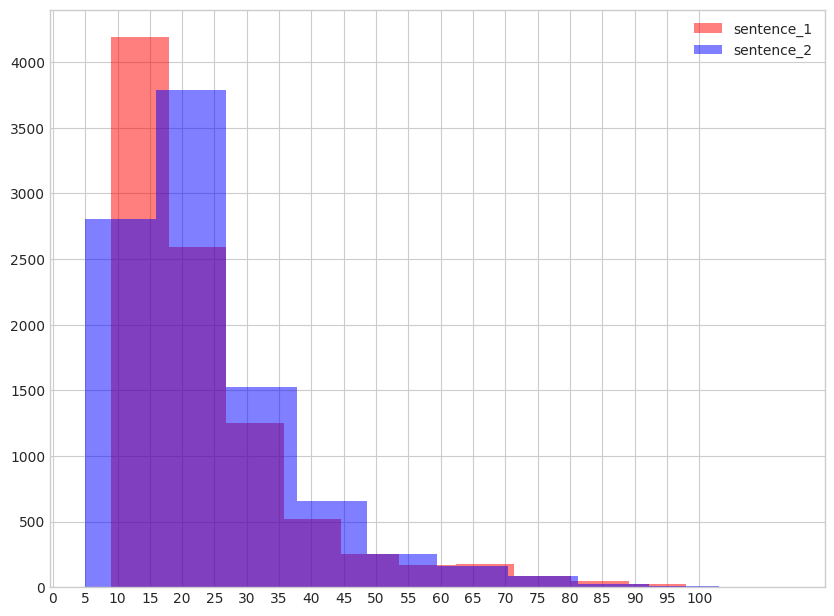

In [84]:
from collections import Counter

xtick = [i*5 for i in range(21)]
plt.figure(figsize=(10,7.5))
plt.hist(train_df['sentence_1'].str.len(), alpha=0.5, color='red',label = 'sentence_1')
plt.hist(train_df['sentence_2'].str.len(), alpha=0.5, color='blue',label = 'sentence_2')
plt.xticks(xtick)
plt.legend()

plt.show()

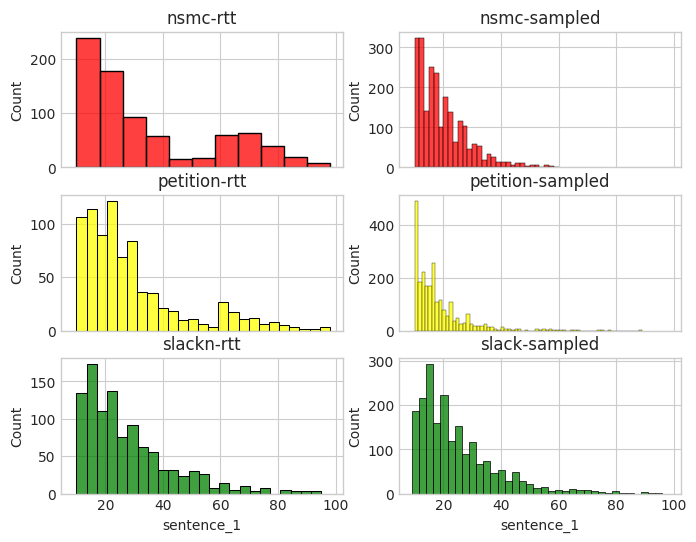

In [85]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(train_df[train_df['source']=='nsmc-rtt']['sentence_1'].str.len(), color="red", ax=axes[0, 0])
b = sns.histplot(train_df[train_df['source']=='nsmc-sampled']['sentence_1'].str.len(), color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(train_df[train_df['source']=='petition-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[1, 0])
d = sns.histplot(train_df[train_df['source']=='petition-sampled']['sentence_1'].str.len(), color="yellow", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(train_df[train_df['source']=='slack-rtt']['sentence_1'].str.len(), color="green", ax=axes[2, 0])
f = sns.histplot(train_df[train_df['source']=='slack-sampled']['sentence_1'].str.len(), color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()

In [90]:
val_df['sentence_1'].str.len().max()

97

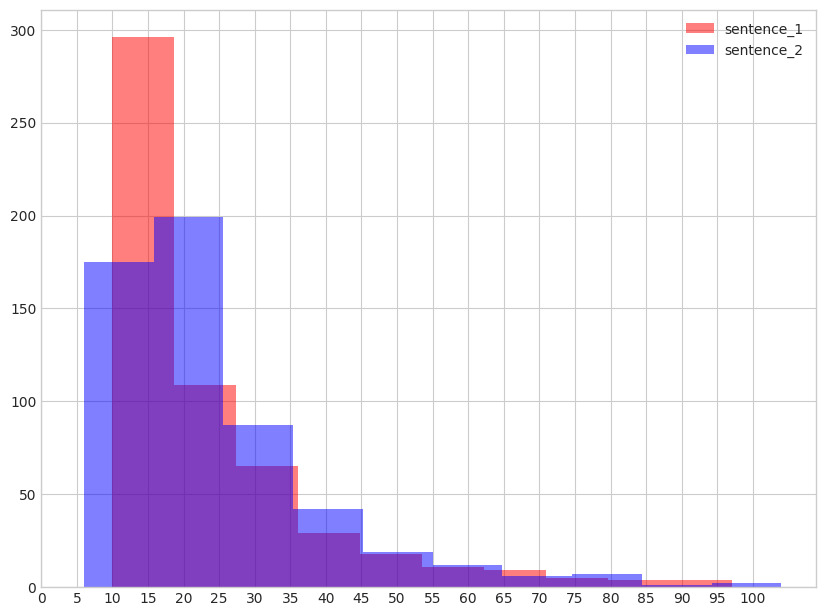

In [83]:
from collections import Counter

xtick = [i*5 for i in range(21)]
plt.figure(figsize=(10,7.5))
plt.hist(val_df['sentence_1'].str.len(), alpha=0.5, color='red',label = 'sentence_1')
plt.hist(val_df['sentence_2'].str.len(), alpha=0.5, color='blue',label = 'sentence_2')
plt.xticks(xtick)
plt.legend()

plt.show()

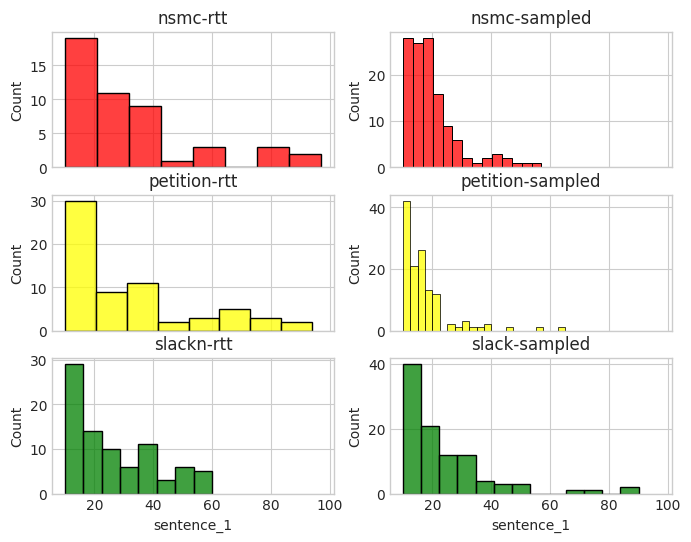

In [87]:
f, axes = plt.subplots(3, 2, figsize=(8, 6), sharex=True)

a = sns.histplot(val_df[val_df['source']=='nsmc-rtt']['sentence_1'].str.len(), color="red", ax=axes[0, 0])
b = sns.histplot(val_df[val_df['source']=='nsmc-sampled']['sentence_1'].str.len(), color="red", ax=axes[0, 1])
a.set_title('nsmc-rtt')
b.set_title('nsmc-sampled')

c = sns.histplot(val_df[val_df['source']=='petition-rtt']['sentence_1'].str.len(), color="yellow", ax=axes[1, 0])
d = sns.histplot(val_df[val_df['source']=='petition-sampled']['sentence_1'].str.len(), color="yellow", ax=axes[1, 1])
c.set_title('petition-rtt')
d.set_title('petition-sampled')

e = sns.histplot(val_df[val_df['source']=='slack-rtt']['sentence_1'].str.len(), color="green", ax=axes[2, 0])
f = sns.histplot(val_df[val_df['source']=='slack-sampled']['sentence_1'].str.len(), color="green", ax=axes[2, 1])
e.set_title('slackn-rtt')
f.set_title('slack-sampled')

plt.show()